In [3]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

In [4]:
df=CSV.read("C:\\Users\\lovy1\\OneDrive\\Desktop\\assignment_2_data.csv", DataFrame)

Row,x,y,sigma(y),sigma(x),rho(xy)
,Int64,Int64,Int64,Int64,Float64
1,201,592,61,9,-0.84
2,244,402,25,4,0.31
3,47,583,38,11,0.64
4,287,402,15,7,-0.27
5,203,495,21,5,-0.33
6,58,173,15,9,0.67
7,210,479,27,4,-0.2
8,202,504,14,4,-0.05
9,198,510,30,11,-0.84


In [5]:
function linear_fit(x,y,σy)
    a=ones(length(x))
    A=hcat(a,x)
    C=diagm(σy.^2)
    Q=inv(transpose(A)*inv(C)*A)
    P=transpose(A)*inv(C)*y
    W=Q*P
    Y=x*W[2]+a*W[1]
    plot(x,Y)
    
    scatter!(x,y,yerr=σy)
end

linear_fit (generic function with 1 method)

# Question 1

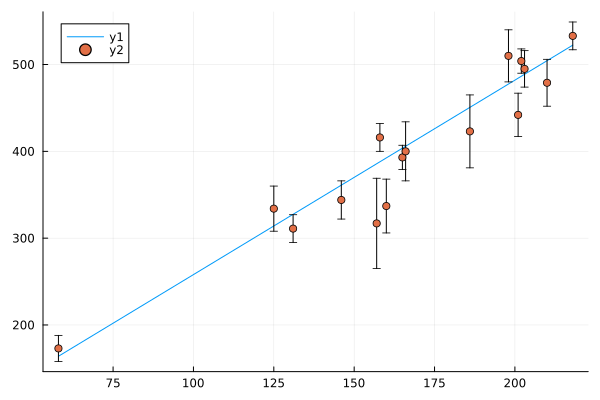

In [6]:
linear_fit(df[5:20,1],df[5:20,2],df[5:20,3])

# Question 2

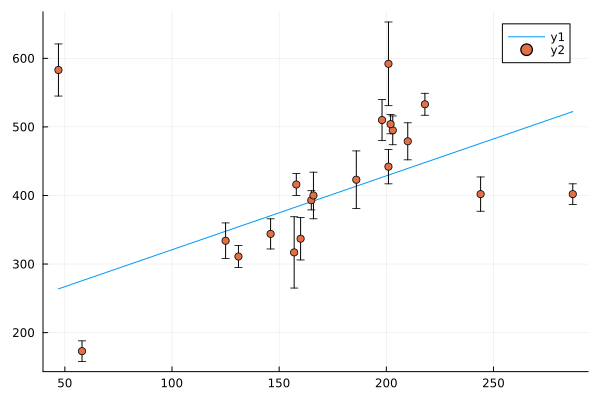

In [7]:
linear_fit(df[:,1],df[:,2],df[:,3])

In [8]:
function quadratic_fit(x,y,σy)
    a=ones(length(x))
    x²=x.^2
    A=hcat(a,x,x²)
    C=diagm(σy.^2)
    Q=inv(transpose(A)*inv(C)*A)
    P=transpose(A)*inv(C)*y
    W=Q*P
    Y=(x.^2)*W[3]+x*W[2]+a*W[1]
    
    plot(sort(x),sort(Y))
    scatter!(x,y,yerr=σy)
end

quadratic_fit (generic function with 1 method)

# Question 3

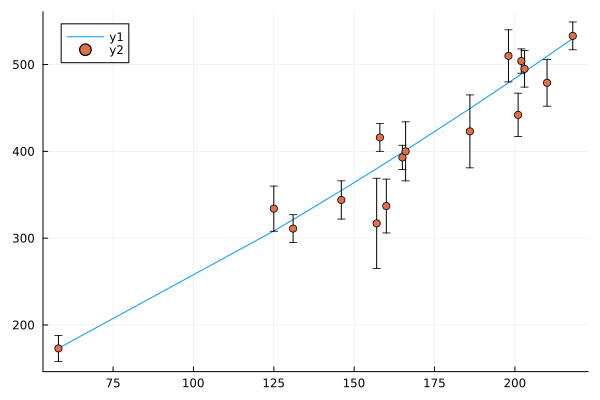

In [9]:
quadratic_fit(df[5:20,1],df[5:20,2],df[5:20,3])

# Question 4

The distribution function $t_{i}$ is: 

$ p(tᵢ|σₜᵢ,T)$ = $\frac{1}{\sqrt{2\pi{\sigma_{ti}}^{2}}}$ exp$\left(\frac{-{(t_{i}-T)}^{2}}{2{\sigma_{ti}}^{2}}\right)$
    
likelihood the become
                         
$ L = \prod_{i=1}^{N} p(t_{i} | \sigma_{ti}, T)$    

and log likelihood 

ln$L = K - \sum_{i = 1}^{N}$ $ \left(\frac{{(t_{i}-T)}^{2}}{2{\sigma_{ti}}^{2}} \right)$,   where $K$ is some constant

The maximum log likelihood is obtained when the derivative to $T$ is zero: 

$0 = \frac{d}{dT}$ln$L = \sum_{i=1}^{N}\frac{{(t_{i}-T)}}{{\sigma_{ti}}^{2}}$

This is a maximum: 

$\frac{d}{dT}$ln$L = -\sum_{i=1}^{N}\frac{1}{{\sigma_{ti}}^{2}}<0$

The maximum log likelihood is obtained when: 
$ T = \frac{\sum_{i=1}^{N}\frac{t_{i}}{{\sigma_{ti}}^{2}}}{\sum_{i=1}^{N}\frac{1}{{\sigma_{ti}}^{2}}}$

# Question 5

As

$\chi^{2} = {\left[Y-AX\right]}^{T}{C}^{-1}\left[Y-AX\right]$

Take a derivative with respect to $X$ as                          
        
$0 = \frac{d}{dX}{\chi}^{2} = -{A}^{T}{C}^{-1}\left[Y-AX\right]-{\left[Y-AX\right]}^{T}{C}^{-1}A$

or  

${A}^{T}{C}^{-1}AX= {A}^{T}{C}^{-1}Y$ where $Y = AX$ used from equation (6)

further solving above equation for $X$

$X = {\left[{A}^{T}{C}^{-1}A\right]}^{-1}\left[{A}^{T}{C}^{-1}Y\right]$

which is equation (5)

# Question 6

In [10]:
using CSV, DataFrames, Plots, Statistics, Measures
data = CSV.read("C:\\Users\\lovy1\\OneDrive\\Desktop\\assignment_2_data.csv", DataFrame)
iterations = 1000000
samples = 100000
init_params = [30, 2.25, 0.25, mean(data[:,2]), std(data[:,2])^2] # b, m, Pb, Yb, Vb

function test_distribution(x, y, sig_y, b, m, Pb, Yb, Vb)
    return ((1 - Pb) / (sqrt(2 * pi) * sig_y)) * exp(-0.5 * ((y - m * x - b) / sig_y)^2) + (Pb / (sqrt(2 * pi * abs(Vb + sig_y^2)))) * exp(-0.5 * ((y - Yb)^2 / abs(Vb + sig_y^2)))
end

function likelihood(data, b, m, Pb, Yb, Vb)
    x = data[:,1]
    y = data[:,2]
    sig_y = data[:,3]
    return prod([test_distribution(x[i], y[i], sig_y[i], b, m, Pb, Yb, Vb) for i in 1:length(y)])
end

sampled_params = []
params = init_params

for i in 1:iterations
    params_new = params + randn(5)
    params_new[3] = rand() # Pb
    params_new[5] = rand() + params[5] # Vb
    likelihood_old = likelihood(data, params[1], params[2], params[3], params[4], params[5])
    likelihood_new = likelihood(data, params_new[1], params_new[2], params_new[3], params_new[4], params_new[5])
    if rand() < likelihood_new / likelihood_old
        global params = params_new
    end
    if i > (iterations - samples)
        push!(sampled_params, params)
    end
end
     

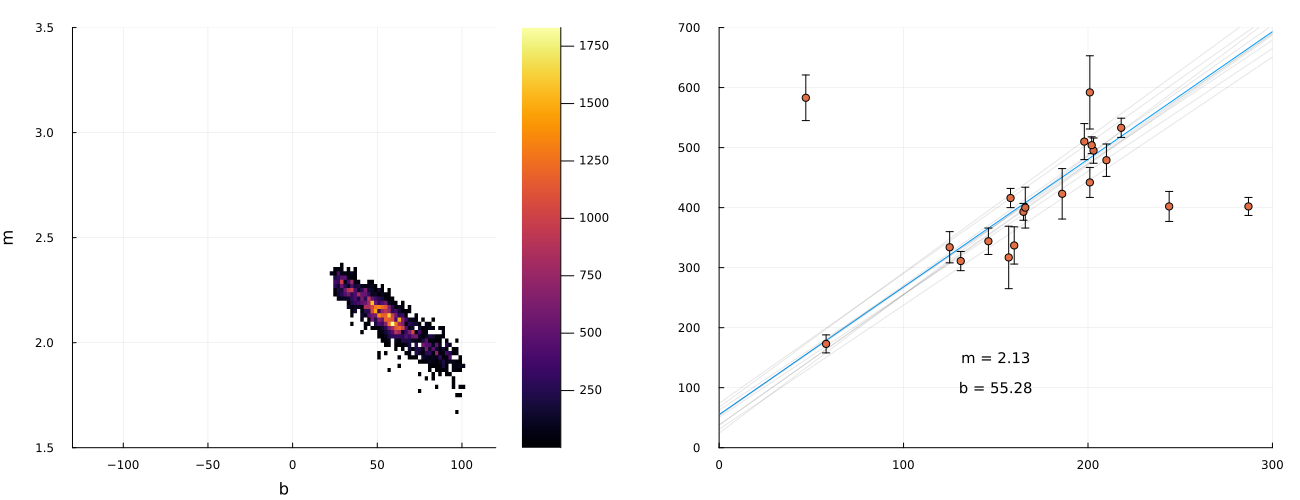

In [11]:
hist_bm = histogram2d([s[1] for s in sampled_params], [s[2] for s in sampled_params], xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.5))

# best fit line
b_best = mean([s[1] for s in sampled_params])
m_best = mean([s[2] for s in sampled_params])
plot_lines = plot(x -> m_best*x + b_best, 0, 300, alpha = 1)
plot_lines = plot!(data.x, data.y, yerr=data[:,3], seriestype=:scatter)

## Draw 10 lines from the posterior distribution
for i in 1:10
    b = rand([s[1] for s in sampled_params])
    m = rand([s[2] for s in sampled_params])
    plot_lines = plot!(x -> m*x + b, 0, 300, color = :black, alpha = 0.1, xlims = (0,300), ylims = (0,700))
end

plot_lines = annotate!(150, 150, text("m = $(round(m_best, digits=2))", 10))
plot_lines = annotate!(150,100, text("b = $(round(b_best, digits=2))", 10))

plot(hist_bm, plot_lines, legend = false, size = (1300, 500), padding = 5, layout = (1,2), margin = 5mm)


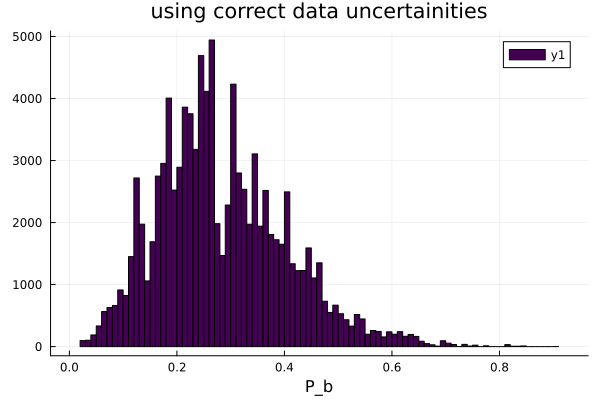

In [12]:
## Plot with marginalization over m, b, Vb, Yb
histogram([s[3] for s in sampled_params], bins=100, c=:viridis, xlabel="P_b", title = "using correct data uncertainities", density = true)
     

# Question 7

In [13]:
using CSV, DataFrames, Plots, Statistics, Measures
data = CSV.read("C:\\Users\\lovy1\\OneDrive\\Desktop\\assignment_2_data.csv", DataFrame)
sigmay= data[:,3]./2
iterations = 1000000
samples = 100000
init_params = [30, 2.24, 0.25, mean(data[:,2])/2, std(data[:,2])^2/4] # b, m, Pb, Yb, Vb

function test_distribution(x, y, sig_y, b, m, Pb, Yb, Vb)
    return ((1 - Pb) / (sqrt(2 * pi) * sig_y)) * exp(-0.5 * ((y - m * x - b) / sig_y)^2) + (Pb / (sqrt(2 * pi * abs(Vb + sig_y^2)))) * exp(-0.5 * ((y - Yb)^2 / abs(Vb + sig_y^2)))
end

function likelihood(data, b, m, Pb, Yb, Vb)
    x = data.x
    y = data.y
    sig_y = sigmay
    return prod([test_distribution(x[i], y[i], sig_y[i], b, m, Pb, Yb, Vb) for i in 1:length(y)])
end

sample = []
params = init_params
for i in 1:iterations
    params_new = params + randn(5)
    params_new[3] = rand() # Pb
    if params_new[5] < 0 # Vb
        params_new[5] = -params_new[5]
    end
    likelihood_old = likelihood(data, params[1], params[2], params[3], params[4], params[5])
    likelihood_new = likelihood(data, params_new[1], params_new[2], params_new[3], params_new[4], params_new[5])
    if rand() < likelihood_new / likelihood_old
        global params = params_new
    end
    if i > (iterations - samples)
        push!(sample, params)
    end
end

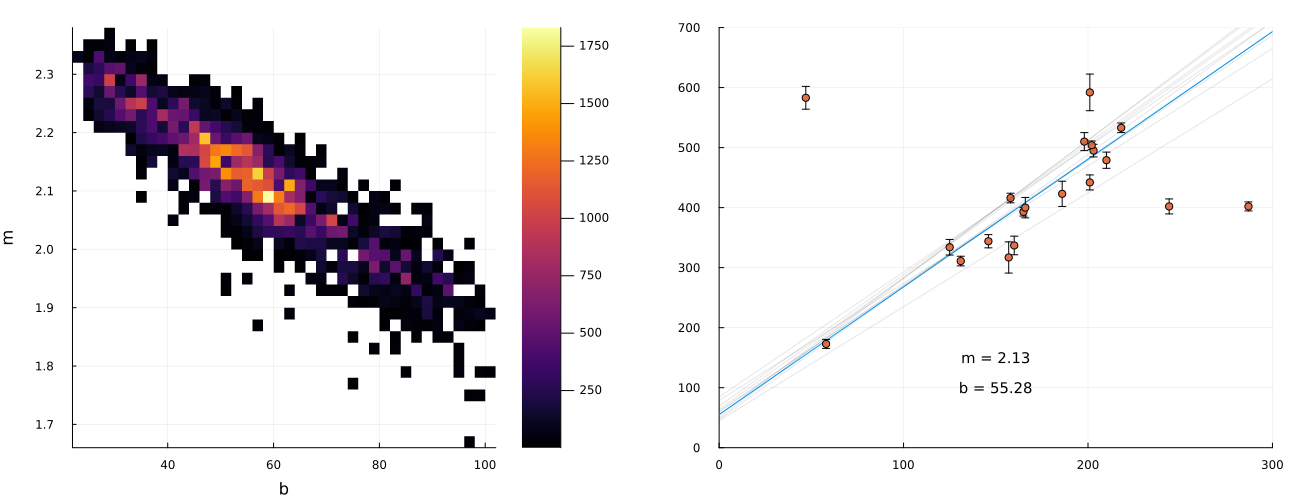

In [14]:
hist_bm = histogram2d([s[1] for s in sampled_params], [s[2] for s in sampled_params],xlabel="b", ylabel="m")

# best fit line
b_best = mean([s[1] for s in sampled_params])
m_best = mean([s[2] for s in sampled_params])
plot_lines = plot(x -> m_best*x + b_best, 0, 300, alpha = 1)
plot_lines = plot!(data.x, data.y, yerr=sigmay, seriestype=:scatter)

# Draw 10 lines from the posterior distribution
for i in 1:10
    b = rand([s[1] for s in sampled_params])
    m = rand([s[2] for s in sampled_params])
    plot_lines = plot!(x -> m*x + b, 0, 300, color = :black, alpha = 0.1, xlims = (0,300), ylims = (0,700))
end

plot_lines = annotate!(150, 150, text("m = $(round(m_best, digits=2))", 10))
plot_lines = annotate!(150,100, text("b = $(round(b_best, digits=2))", 10))

plot(hist_bm, plot_lines, legend = false, size = (1300, 500), padding = 5, layout = (1,2), margin = 5mm)


# Question 10

In [15]:
#for 1st question data


x1=df[5:20,1]
y1=df[5:20,2]
σy1=df[5:20,3]
function get_chi2_ex1(x, Y, sigma_y2)
    A = hcat(ones(length(x)), x)
    C = Matrix(spdiagm(0 => sigma_y2.^2))
    X = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    chi = transpose(Y-A*X)*inv(C)*(Y-A*X)
    return chi
end
function get_chi2_range(N)
    return [(N-2)-sqrt(2*(N-2)), (N-2)+sqrt(2*(N-2))]
end
println("chi² = ",get_chi2_ex1(x1,y1,σy1))
println("chi² range = ", get_chi2_range(length(x1)))

chi² = 18.68076991124081
chi² range = [8.708497377870819, 19.29150262212918]


In [16]:
#for 3rd question data


x=df[:,1]
y=df[:,2]
σy=df[:,3]
function get_chi2_ex1(x, Y, sigma_y2)
    A = hcat(ones(length(x)), x)
    C = Matrix(spdiagm(0 => sigma_y2.^2))
    X = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y)
    chi = transpose(Y-A*X)*inv(C)*(Y-A*X)
    return chi
end
function get_chi2_range(N)
    return [(N-2)-sqrt(2*(N-2)), (N-2)+sqrt(2*(N-2))]
end
println("chi² = ",get_chi2_ex1(x1,y1,σy1))
println("chi² range = ", get_chi2_range(length(x)))

chi² = 18.68076991124081
chi² range = [12.0, 24.0]


# Question 16

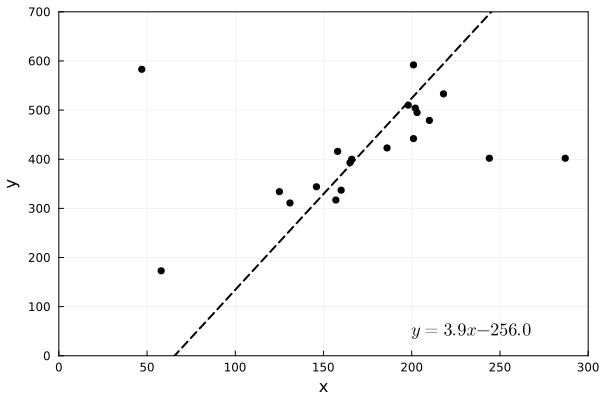

In [19]:
using CSV,DataFrames,Plots,Statistics,LinearAlgebra,LaTeXStrings
df1 = CSV.read("C:\\Users\\lovy1\\OneDrive\\Desktop\\assignment_2_data.csv",DataFrame)
Y = data[:,2]
X = data[:,1]
Z = hcat(X,Y)
#Now compute the PCA solution

Zm = mean.(eachcol(Z))
Q = cov(Z)
eigs = eigen(Q)
maxindx = argmax(eigs.values)
V = eigs.vectors[maxindx,:]
V = V/norm(V)

m = sqrt(1/V[1]^2-1)
bestfit = ([-m*Zm[1]+Zm[2],m])

#Plot result
m = round(bestfit[2],digits=2)
b = round(bestfit[1],digits=0)
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),label=false,xticks=10)
plot!(x -> bestfit[2]*x + bestfit[1], 0, 300,color = :black,w=2,legend=false,line = :dash,xlabel="x",ylabel="y")
scatter!(X,Y,mc=:black)
note=raw"y =\textrm{"*"$m"*raw"}x \textrm{"*"$b"*raw"}"
annotate!( 200,  50, text(latexstring(note),:left, 12))